In [20]:
import pandas as pd
import pydicom
import os
from matplotlib import pyplot as plt
import numpy as np

In [21]:
#pip install pydicom

In [22]:
df = pd.read_csv('trainSet-rle.csv')

In [23]:
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10504 entries, 0 to 10503
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        10504 non-null  object
 1   EncodedPixels  10504 non-null  object
dtypes: object(2)
memory usage: 164.2+ KB


In [25]:
df['EncodedPixels'] = np.where(df['EncodedPixels']==' -1', 0,1 )   

In [26]:
df['ImageId'].nunique()

9676

In [27]:
PathDicom = 'C:/Users/Casper/Desktop/Master1-Cours/rstudio and Python/Application pratique Defi 4/dicom-images-train'

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
   

In [28]:
len(lstFilesDCM)

9712

In [29]:
imgL = [pydicom.read_file(x) for x in lstFilesDCM]

In [30]:
scans=[]
for file in lstFilesDCM:
          dicomds = pydicom.read_file(file, stop_before_pixels=True)
          scans.append(dicomds)


In [31]:
scans[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [32]:
# df_img_dataset = pd.DataFrame(scans)

In [33]:
# df_img_dataset[13][1][-1]

In [34]:
# img_list_id = []
# for i in range(9712):
#     sop = imgL[i]['SOPInstanceUID'][:100]['PatientsSex']
#     img_list_id.append(sop)

In [35]:
# imgL[0]['SOPInstanceUID']

In [36]:
# img_list = pd.DataFrame(img_list_id,columns=['ImageId'])

In [37]:
# imgL[0].to_dataframe()

In [38]:
import pydicom
import pandas as pd
import os

# Get a list of all the DICOM files in the directory
files = lstFilesDCM

# Create an empty list to store the dataframes
dataframes = []
i=0
# Loop through the files
for file in files:
    # Read the DICOM file
    dcm_data = pydicom.dcmread(file)

    # Extract the age and sex information from the DICOM file
    age = dcm_data.PatientAge
    sex = dcm_data.PatientSex
    ids = dcm_data.SOPInstanceUID

    # Create a dataframe with the age and sex information
    data = {"age": age, "sex": sex,"ImageId" : ids}
    df_s = pd.DataFrame(data,index=[i])
    i=i+1

    # Add the dataframe to the list of dataframes
    dataframes.append(df_s)

# Concatenate all the dataframes into a single dataframe
df_i = pd.concat(dataframes)


In [39]:
df_i

,age,sex,ImageId
0,10,F,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...
1,50,F,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...
2,68,F,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...
3,65,M,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...
4,45,F,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...
...,...,...,...
9707,47,F,1.2.276.0.7230010.3.1.4.8323329.5792.151787519...
9708,76,M,1.2.276.0.7230010.3.1.4.8323329.5793.151787519...
9709,58,M,1.2.276.0.7230010.3.1.4.8323329.5794.151787519...
9710,16,M,1.2.276.0.7230010.3.1.4.8323329.5795.151787519...


In [46]:
df

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
...,...,...
10499,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1
10500,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1
10501,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,1
10502,1.2.276.0.7230010.3.1.4.8323329.13252.15178752...,0


In [41]:
df_f = pd.merge(df,df_i,on="ImageId",how="right")

In [42]:
df_f

,ImageId,EncodedPixels,age,sex
0,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,0.0,10,F
1,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,0.0,50,F
2,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,0.0,68,F
3,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,0.0,65,M
4,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...,0.0,45,F
...,...,...,...,...
10535,1.2.276.0.7230010.3.1.4.8323329.5792.151787519...,0.0,47,F
10536,1.2.276.0.7230010.3.1.4.8323329.5793.151787519...,0.0,76,M
10537,1.2.276.0.7230010.3.1.4.8323329.5794.151787519...,0.0,58,M
10538,1.2.276.0.7230010.3.1.4.8323329.5795.151787519...,1.0,16,M


In [43]:
df_f.drop_duplicates("ImageId",inplace=True)

In [44]:
df_f.reset_index(drop=True,inplace=True)

In [45]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler



# # Create a scaler object
# scaler = MinMaxScaler(feature_range=(0, 100))

# # Scale and encode the values in the "age" column
# df_f["encoded_age"] = df_f.apply(lambda x: (scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0] + 128) if x["sex"] == "M" else scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0], axis=1)


In [190]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Create a scaler object
# scaler = MinMaxScaler(feature_range=(0, 100))

# # Scale and encode the values in the "age" column
# df_f["encoded_age"] = df_f.apply(lambda x: (scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0] + 128) if x["sex"] == "M" else scaler.fit_transform(df_f.loc[x.index, "age"].values.reshape(-1, 1)).flatten()[0], axis=1)


KeyError: "None of [Index(['ImageId', 'EncodedPixels', 'age', 'sex'], dtype='object')] are in the [index]"

In [47]:
def FemmesScale(age):
  # Vérifie que l'âge est bien compris entre 0 et 100
  if age < 0 or age > 120:
    raise ValueError("L'âge doit être compris entre 0 et 100")

  # Calcule l'âge recodé entre 0 et 132
  scaled_age = age * 127 / 100

  return scaled_age

def HommesScale(age):
  # Vérifie que l'âge est bien compris entre 0 et 100
  if age < 0 or age > 120:
    raise ValueError("L'âge doit être compris entre 0 et 100")

  # Calcule l'âge recodé entre 128 et 255
  scaled_age = age * (255 - 128) / 100 + 128

  return scaled_age

In [48]:
HommesScale(65)

210.55

In [49]:
df_f['age'] = df_f['age'].astype("int")
df_f['sex'] = df_f['sex'].replace("F",0)
df_f['sex'] = df_f['sex'].replace("M",1)

In [50]:
df_f[df_f['age']>100]

,ImageId,EncodedPixels,age,sex
1106,1.2.276.0.7230010.3.1.4.8323329.11106.15178752...,0.0,413,0
8745,1.2.276.0.7230010.3.1.4.8323329.4830.151787518...,0.0,148,1


In [51]:
def replace_age(age):
    if age > 100:
        return df_f['age'].mean()
    else:
        return age

df_f['age'] = df_f['age'].apply(replace_age)

In [53]:
# ls = []
# for x in df_f[['age','sex']:
#     if (df_f['sex'][x] == 0):
#         df_s = FemmesScale(df_f['age'][x])
#         ls.append(df_s)
#     else:
#         df_s = HommesScale(df_f['age'][x])
#         ls.append(df_s)
#         #print('hi')
# df_f['encoded_age'] = ls

In [54]:
#   df_f["scale"] = ""
  
#   # Iterate over the rows of the DataFrame
#   for index, row in df_f.iterrows():
#     # If the row is a male, apply the HommesScale function to the age column
#     if row["sex"] == "M":
#       df_f.at[index, "scale"] = HommesScale(row["age"])
#     # If the row is a female, apply the FemmesScale function to the age column
#     elif row["sex"] == "F":
#       df_f.at[index, "scale"] = FemmesScale(row["age"])

In [55]:

  df_f["encoded_age"] = ""
  
  # Define a dictionary with the mapping of sex to the appropriate function
  sex_to_function = {1: HommesScale, 0: FemmesScale}
  
  # Iterate over the rows of the DataFrame
  for index, row in df_f.iterrows():
    # Use the dictionary to lookup the appropriate function for the sex
    # and apply it to the age column
    df_f.at[index, "encoded_age"] = sex_to_function[row["sex"]](row["age"])

In [58]:
df_f['encoded_age']=df_f['encoded_age'].astype("int")

In [225]:
# # df_f["encoded_age"] = df_f['age'].apply(lambda x: HommesScale(x) if (df_f['sex'] == "F") else FemmesScale(x))
# df_f["encoded_age"] = df_f.apply(lambda x: HommesScale(x.age) if (x['sex'] == "F") else FemmesScale(x.age))
# df_f['encoded_age']=df_f['encoded_age'].astype('int')
# df_f    

KeyError: 'sex'

In [59]:
df_f

,ImageId,EncodedPixels,age,sex,encoded_age
0,1.2.276.0.7230010.3.1.4.8323329.10000.15178752...,0.0,10.0,0,12
1,1.2.276.0.7230010.3.1.4.8323329.10001.15178752...,0.0,50.0,0,63
2,1.2.276.0.7230010.3.1.4.8323329.10002.15178752...,0.0,68.0,0,86
3,1.2.276.0.7230010.3.1.4.8323329.10003.15178752...,0.0,65.0,1,210
4,1.2.276.0.7230010.3.1.4.8323329.10004.15178752...,0.0,45.0,0,57
...,...,...,...,...,...
9707,1.2.276.0.7230010.3.1.4.8323329.5792.151787519...,0.0,47.0,0,59
9708,1.2.276.0.7230010.3.1.4.8323329.5793.151787519...,0.0,76.0,1,224
9709,1.2.276.0.7230010.3.1.4.8323329.5794.151787519...,0.0,58.0,1,201
9710,1.2.276.0.7230010.3.1.4.8323329.5795.151787519...,1.0,16.0,1,148


In [19]:
#img = img_list.merge(df,how='left',on='ImageId')

In [31]:
#img.info()

In [14]:
#df['compare'] = (df['ImageId'] == df['img_list'])

12


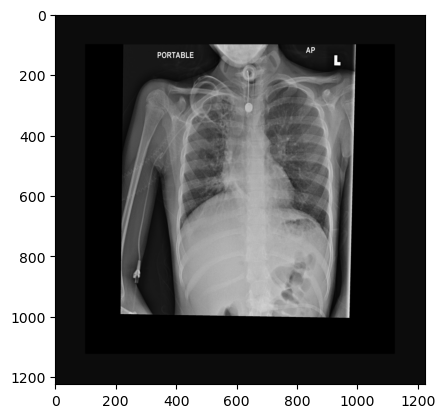

In [60]:
for i,x in zip(lstFilesDCM[0:1],df_f['encoded_age']):
    imgL = pydicom.read_file(i)
    image = imgL.pixel_array
    image = np.pad(image, ((100, 100), (100, 100)), mode="constant", constant_values=x)
    plt.imshow(image , cmap="gray", vmin=0, vmax=255)
    print(x)
    

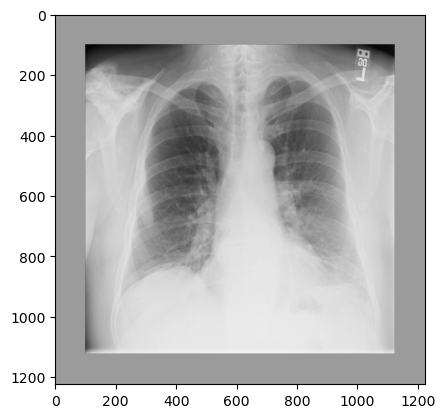

In [133]:
image = imgL[20].pixel_array

# Add white pixels around the image
image = np.pad(image, ((100, 100), (100, 100)), mode="constant", constant_values=155)
plt.imshow(image , cmap="gray", vmin=0, vmax=255)
# Save the padded image to a new DICOM file
#imgL[0].PixelData = image.tobytes()